In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.loading as loading
import visual_behavior.visualization.utils as utils

from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/session_api_utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
import visual_behavior.ophys.response_analysis.cell_metrics as cell_metrics

In [5]:
ophys_experiment_table = loading.get_filtered_ophys_experiment_table(release_data_only=True)

ophys_experiment_ids = ophys_experiment_table.index.values

In [6]:
ophys_experiment_id = ophys_experiment_ids[50]

dataset = loading.get_ophys_dataset(ophys_experiment_id, from_lims=False, from_nwb=False)

In [7]:
# analysis = ResponseAnalysis(dataset, use_extended_stimulus_presentations=True)

# sdf = analysis.get_response_df(df_name='stimulus_response_df')

In [1]:
import visual_behavior.ophys.response_analysis.cell_metrics as cell_metrics

In [9]:
condition = 'traces'
session_subset = 'full_session'
stimulus = 'none'
use_events = True

ophys_experiment_ids = ophys_experiment_table.index.values

trace_metrics = cell_metrics.load_cell_metrics_table_for_experiments('all_experiments', condition, stimulus, session_subset, use_events)

AttributeError: module 'visual_behavior.ophys.response_analysis.cell_metrics' has no attribute 'load_cell_metrics_table_for_experiments'

In [15]:
len(trace_metrics.cell_specimen_id.unique())

24286

In [16]:
len(trace_metrics.ophys_experiment_id.unique())

1109

In [17]:
trace_metrics.head()

,cell_specimen_id,robust_signal,robust_noise,robust_snr,trace_max,trace_mean,trace_var,trace_std,trace_max_over_std,trace_mean_over_std,...,isi_experiment_id,imaging_depth,targeted_structure,published_at,date_of_acquisition,session_type,session_tags,failure_tags,model_outputs_available,location
0,1086622595,NaN,NaN,NaN,0.640438,0.002467,0.000572,0.023925,26.768717,0.103105,...,858992726,225,VISp,2021-03-25 00:00:00.000000,2019-09-24 16:00:00.000000,OPHYS_3_images_A,NaN,NaN,True,Sst_VISp_225
1,1086620813,NaN,NaN,NaN,0.540531,0.002530,0.000402,0.020062,26.943185,0.126088,...,858992726,225,VISp,2021-03-25 00:00:00.000000,2019-09-24 16:00:00.000000,OPHYS_3_images_A,NaN,NaN,True,Sst_VISp_225
2,1086622778,NaN,NaN,NaN,0.831274,0.009175,0.001922,0.043838,18.962389,0.209301,...,858992726,225,VISp,2021-03-25 00:00:00.000000,2019-09-24 16:00:00.000000,OPHYS_3_images_A,NaN,NaN,True,Sst_VISp_225
3,1086621629,NaN,NaN,NaN,0.444463,0.003766,0.000587,0.024227,18.345520,0.155464,...,858992726,225,VISp,2021-03-25 00:00:00.000000,2019-09-24 16:00:00.000000,OPHYS_3_images_A,NaN,NaN,True,Sst_VISp_225
4,1086621968,NaN,NaN,NaN,0.758823,0.003140,0.000658,0.025643,29.591514,0.122447,...,858992726,225,VISp,2021-03-25 00:00:00.000000,2019-09-24 16:00:00.000000,OPHYS_3_images_A,NaN,NaN,True,Sst_VISp_225


In [18]:
trace_metrics.keys()

Index(['cell_specimen_id', 'robust_signal', 'robust_noise', 'robust_snr',
       'trace_max', 'trace_mean', 'trace_var', 'trace_std',
       'trace_max_over_std', 'trace_mean_over_std',
       'population_coupling_r_value', 'population_coupling_p_value',
       'ophys_experiment_id', 'ophys_session_id', 'condition',
       'session_subset', 'stimuli', 'events', 'equipment_name', 'donor_id',
       'full_genotype', 'mouse_id', 'reporter_line', 'driver_line', 'sex',
       'age_in_days', 'foraging_id', 'cre_line', 'indicator', 'session_number',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'behavior_session_id',
       'ophys_container_id', 'project_code', 'container_workflow_state',
       'experiment_workflow_state', 'session_name', 'isi_experiment_id',
       'imaging_depth', 'targeted_structure', 'published_at',
       'date_of_acquisition', 'session_type', 'session_tags', 'failure_tags',
       'model_outputs_availab

In [20]:
metrics = list(trace_metrics.keys())[:12]
metrics

['cell_specimen_id',
 'robust_signal',
 'robust_noise',
 'robust_snr',
 'trace_max',
 'trace_mean',
 'trace_var',
 'trace_std',
 'trace_max_over_std',
 'trace_mean_over_std',
 'population_coupling_r_value',
 'population_coupling_p_value']

### merge with GLM dropouts 

In [21]:
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior_glm import GLM_visualization_tools as gvt
from visual_behavior_glm.glm import GLM

In [35]:
model_output_types = ['absolute_change_from_full', 'adj_fraction_change_from_full']
model_output_type = model_output_types[0]
kind = 'events' # or 'dff'
glm_version = '12_{}_L2_optimize_by_session'.format(kind)

colors = gvt.project_colors()

In [36]:
%%time
glm = gat.build_pivoted_results_summary(value_to_use=model_output_type, results_summary=None, 
                                       glm_version=glm_version, cutoff=None)
glm = glm.sort_values('date_of_acquisition')

glm = glm[(glm.project_code == 'VisualBehavior') |
                     (glm.project_code == 'VisualBehaviorTask1B') |
                     (glm.project_code =='VisualBehaviorMultiscope')].copy()
glm.cre_line.value_counts(normalize=False)

Wall time: 2min 38s


Slc17a7-IRES2-Cre    56318
Vip-IRES-Cre          7241
Sst-IRES-Cre          2666
Name: cre_line, dtype: int64

In [37]:
glm.keys()

Index(['identifier', 'Full', 'all-images', 'beh_model', 'behavioral',
       'cognitive', 'correct_rejects', 'expectation', 'face_motion_PC_0',
       'face_motion_PC_1',
       ...
       'isi_experiment_id', 'imaging_depth', 'targeted_structure',
       'published_at', 'date_of_acquisition', 'session_type', 'session_tags',
       'failure_tags', 'model_outputs_available', 'location'],
      dtype='object', length=116)

In [38]:
glm['Full'].unique()

array([0.])

In [39]:
df = trace_metrics.merge(glm[['Full', 'cell_specimen_id', 'ophys_experiment_id']], on=['cell_specimen_id', 'ophys_experiment_id'])

In [40]:
df.keys()

Index(['cell_specimen_id', 'robust_signal', 'robust_noise', 'robust_snr',
       'trace_max', 'trace_mean', 'trace_var', 'trace_std',
       'trace_max_over_std', 'trace_mean_over_std',
       'population_coupling_r_value', 'population_coupling_p_value',
       'ophys_experiment_id', 'ophys_session_id', 'condition',
       'session_subset', 'stimuli', 'events', 'equipment_name', 'donor_id',
       'full_genotype', 'mouse_id', 'reporter_line', 'driver_line', 'sex',
       'age_in_days', 'foraging_id', 'cre_line', 'indicator', 'session_number',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'behavior_session_id',
       'ophys_container_id', 'project_code', 'container_workflow_state',
       'experiment_workflow_state', 'session_name', 'isi_experiment_id',
       'imaging_depth', 'targeted_structure', 'published_at',
       'date_of_acquisition', 'session_type', 'session_tags', 'failure_tags',
       'model_outputs_availab

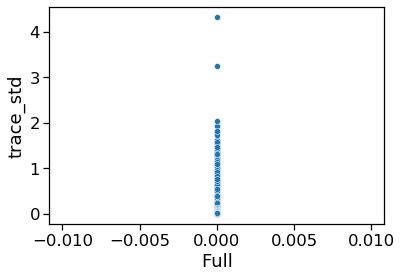

In [41]:
sns.scatterplot(data=df, x='Full', y='trace_std')